<a href="https://colab.research.google.com/github/LillyBal/PLS_SEM_Capstone/blob/main/PLS_SEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PLSEM
Refernce: Didi Sundiman https://drive.google.com/file/d/1X6DvxHaIbT0IQFoZTbPPlv5viAVXmz0a/view

Partial Least Squares Path Modeling (PLS-PM) is one of the statistical data analysis methods which includes using a data processing approach with PLS-SEM (Sanchez, 2013)

The three stages of the PLS-PM process are as follows:

1. Measurement Model Assessment
2. Structural Model Assessment
3. Bootstrapping

# Plspm library installation


In [9]:
pip install plspm

**Import required libraries for analysis**




In [10]:
import pandas as pd, plspm.config as c
from plspm.plspm import Plspm
from plspm.scheme import Scheme
from plspm.mode import Mode
from plspm.bootstrap import Bootstrap



```
# This is formatted as code
```

# Prepare model

In [11]:
df =pd.read_csv("data (8).csv")
df = df.drop(df.loc[:, 'Blockchain_Knowledge':'Income_Descriptives'].columns, axis = 1)


**Model to be tested**

The image below is the model that will be tested with 
variables

image.png()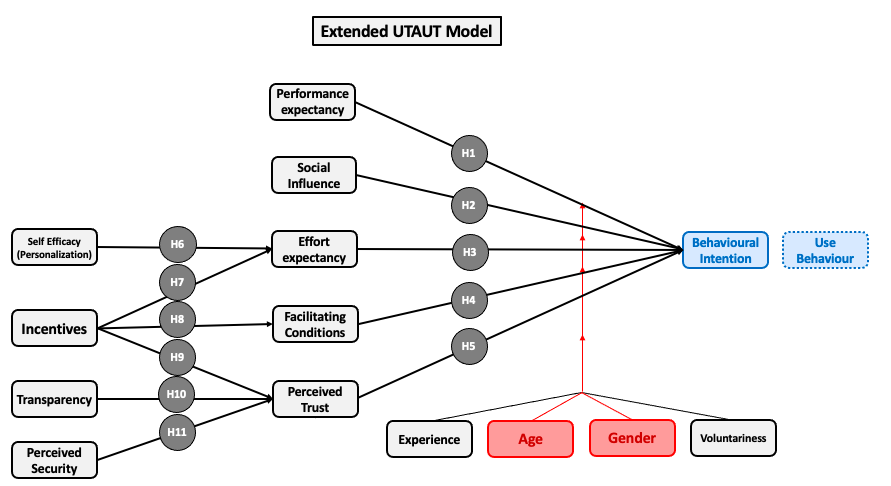

**Inner model**

In [12]:
innerModelSaya = c.Structure()
innerModelSaya.add_path(["Facilitating Conditions"], ["Behaviour Intention"]) 
innerModelSaya.add_path(["Performance Expectancy"], ["Behaviour Intention"])
innerModelSaya.add_path(["Effort Expectancy"], ["Behaviour Intention"])
innerModelSaya.add_path(["Perceived Trust"], ["Behaviour Intention"])
innerModelSaya.add_path(["Social Influence"], ["Behaviour Intention"])
innerModelSaya.add_path(["Incentives"], ["Behaviour Intention"])
innerModelSaya.add_path(["Self Efficacy"], ["Effort Expectancy"])
innerModelSaya.add_path(["Incentives"], ["Facilitating Conditions", "Effort Expectancy", "Perceived Trust"])
innerModelSaya.add_path(["Transparency"], ["Perceived Trust"])
innerModelSaya.add_path(["Perceived Security"], ["Perceived Trust"])

**Outer model**

In [13]:
outerModelSaya = c.Config(innerModelSaya.path(), scaled=False)
outerModelSaya.add_lv_with_columns_named("Facilitating Conditions", Mode.A, df, "Q12 Facilitating_") 
outerModelSaya.add_lv_with_columns_named("Performance Expectancy", Mode.A, df, "Q10 Performance_")
outerModelSaya.add_lv_with_columns_named("Effort Expectancy", Mode.A, df, "Q11 Effort_")
outerModelSaya.add_lv_with_columns_named("Perceived Trust", Mode.A, df, "Q8 Turst_")
outerModelSaya.add_lv_with_columns_named("Transparency", Mode.A, df, "Q5 Transparency_")
outerModelSaya.add_lv_with_columns_named("Perceived Security", Mode.A, df, "Q7 Security_")
outerModelSaya.add_lv_with_columns_named("Incentives", Mode.A, df, "Q4 Incentives_")
outerModelSaya.add_lv_with_columns_named("Self Efficacy", Mode.A, df, "Q6 Self Efficacy_")
outerModelSaya.add_lv_with_columns_named("Social Influence", Mode.A, df, "Q12 Social_")
outerModelSaya.add_lv_with_columns_named("Behaviour Intention", Mode.A, df, "Q13 Behaviour intent_")


**Run PLSPM**

In [15]:
plspm_calc = Plspm(df, outerModelSaya, Scheme.CENTROID)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Tahap #1 Measurement Model Assessment


# Unidimensionality
Does the indicator represent well the variable it measures? cronbach alpha > 0.7

In [16]:
asses_uni = plspm_calc.unidimensionality()
asses_uni

,mode,mvs,cronbach_alpha,dillon_goldstein_rho,eig_1st,eig_2nd
Perceived Security,A,4.0,0.844362,0.898384,2.773698,0.735707
Transparency,A,5.0,0.863768,0.902217,3.246951,0.597466
Self Efficacy,A,5.0,0.836424,0.887474,3.101615,0.826995
Incentives,A,4.0,0.688464,0.812230,2.175316,1.058538
Perceived Trust,A,3.0,0.870862,0.920802,2.384822,0.358606
Effort Expectancy,A,3.0,0.850168,0.909268,2.309034,0.399706
Facilitating Conditions,A,3.0,0.635560,0.806639,1.789270,0.886377
Social Influence,A,2.0,0.598407,0.832781,1.426948,0.573052
Performance Expectancy,A,5.0,0.900363,0.926298,3.577837,0.485529
Behaviour Intention,A,3.0,0.868373,0.919354,2.375050,0.343487


From the results of the command in the table above, it appears that the Cronbach alpha value for all variables is greater than 0.7, this indicates that the indicator represents the variables it measures well.


#Testing the relationship and reliability indicators
Does each indicator have a good relationship and reliability to measure its respective variables? through outer loading > 0.7 and communality test > 0.5

In [17]:
asses_reliability = plspm_calc.outer_model()
asses_reliability

,weight,loading,communality,redundancy
Q10 Performance_1,0.246129,0.854839,0.730749,0.000000
Q10 Performance_2,0.228441,0.845460,0.714803,0.000000
Q10 Performance_3,0.236246,0.803848,0.646171,0.000000
Q10 Performance_4,0.244034,0.870061,0.757006,0.000000
Q10 Performance_5,0.298706,0.851423,0.724921,0.000000
Q11 Effort_1,0.374469,0.843894,0.712156,0.083272
Q11 Effort_2,0.443582,0.890280,0.792599,0.092678
Q11 Effort_3,0.409652,0.895769,0.802403,0.093825
Q12 Facilitating_1,0.286850,0.741303,0.549531,0.018873
Q12 Facilitating_2,0.469560,0.844634,0.713407,0.024501


The table of test results above shows the loading value of all indicators are greater than 0.7 and the value of communality is above 0.5(except Security 3, Self Efficacy3, Transparency 5,incentives 3, Facilitating 3), meaning all except the exceptation representing the construct well.


In [18]:
asses_ave = plspm_calc.inner_summary()
asses_ave

,type,r_squared,r_squared_adj,block_communality,mean_redundancy,ave
Behaviour Intention,Endogenous,0.609306,0.596062,0.791467,0.482246,0.791467
Effort Expectancy,Endogenous,0.116929,0.107172,0.769053,0.089925,0.769053
Facilitating Conditions,Endogenous,0.034343,0.029037,0.576087,0.019785,0.576087
Incentives,Exogenous,0.000000,0.000000,0.518576,0.000000,0.518576
Perceived Security,Exogenous,0.000000,0.000000,0.690730,0.000000,0.690730
Perceived Trust,Endogenous,0.580048,0.573049,0.794508,0.460853,0.794508
Performance Expectancy,Exogenous,0.000000,0.000000,0.714730,0.000000,0.714730
Self Efficacy,Exogenous,0.000000,0.000000,0.619392,0.000000,0.619392
Social Influence,Exogenous,0.000000,0.000000,0.709727,0.000000,0.709727
Transparency,Exogenous,0.000000,0.000000,0.513626,0.000000,0.513626


Save output as excel tables.

In [19]:
with pd.ExcelWriter('before.xlsx') as writer1:
    asses_uni.to_excel(writer1, sheet_name = 'alpha_1', index = True)
    asses_reliability.to_excel(writer1, sheet_name = 'loading_1', index = True)
    asses_ave.to_excel(writer1, sheet_name = 'ave_1', index = True)

Drop items which do not confirm with validity measurments.

In [20]:
df = df.drop('Q2 Technology_6', axis= 1)
df = df.drop('Q12 Facilitating_3', axis= 1)
df = df.drop('Q5 Transparency_5', axis= 1)
df = df.drop('Q5 Transparency_3', axis= 1)
df = df.drop('Q6 Self Efficacy_3', axis= 1)
df = df.drop('Q7 Security_3', axis= 1)
df = df.drop('Q4 Incentives_3', axis= 1)


# After droping items with loadings: Re-Do analysis
**Inner model**

In [21]:
innerModelSaya = c.Structure()
innerModelSaya.add_path(["Facilitating Conditions"], ["Behaviour Intention"]) 
innerModelSaya.add_path(["Performance Expectancy"], ["Behaviour Intention"])
innerModelSaya.add_path(["Effort Expectancy"], ["Behaviour Intention"])
innerModelSaya.add_path(["Perceived Trust"], ["Behaviour Intention"])
innerModelSaya.add_path(["Social Influence"], ["Behaviour Intention"])
innerModelSaya.add_path(["Incentives"], ["Behaviour Intention"])
innerModelSaya.add_path(["Self Efficacy"], ["Effort Expectancy"])
innerModelSaya.add_path(["Incentives"], ["Facilitating Conditions", "Effort Expectancy", "Perceived Trust"])
innerModelSaya.add_path(["Transparency"], ["Perceived Trust"])
innerModelSaya.add_path(["Perceived Security"], ["Perceived Trust"])

**Outer model**

In [22]:
outerModelSaya = c.Config(innerModelSaya.path(), scaled=False)
outerModelSaya.add_lv_with_columns_named("Facilitating Conditions", Mode.A, df, "Q12 Facilitating_") 
outerModelSaya.add_lv_with_columns_named("Performance Expectancy", Mode.A, df, "Q10 Performance_")
outerModelSaya.add_lv_with_columns_named("Effort Expectancy", Mode.A, df, "Q11 Effort_")
outerModelSaya.add_lv_with_columns_named("Perceived Trust", Mode.A, df, "Q8 Turst_")
outerModelSaya.add_lv_with_columns_named("Transparency", Mode.A, df, "Q5 Transparency_")
outerModelSaya.add_lv_with_columns_named("Perceived Security", Mode.A, df, "Q7 Security_")
outerModelSaya.add_lv_with_columns_named("Incentives", Mode.A, df, "Q4 Incentives_")
outerModelSaya.add_lv_with_columns_named("Self Efficacy", Mode.A, df, "Q6 Self Efficacy_")
outerModelSaya.add_lv_with_columns_named("Social Influence", Mode.A, df, "Q12 Social_")
outerModelSaya.add_lv_with_columns_named("Behaviour Intention", Mode.A, df, "Q13 Behaviour intent_")


**Run PLSPM**

In [23]:
plspm_calc = Plspm(df, outerModelSaya, Scheme.CENTROID)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)



# Unidimensionality
does the indicator represent well the variable it measures? cronbach alpha > 0.7

In [26]:
asses_uni = plspm_calc.unidimensionality()
asses_uni

,mode,mvs,cronbach_alpha,dillon_goldstein_rho,eig_1st,eig_2nd
Perceived Security,A,3.0,0.900677,0.937921,2.503037,0.279333
Transparency,A,3.0,0.841877,0.904640,2.279231,0.369897
Self Efficacy,A,4.0,0.877420,0.916025,2.927826,0.496690
Incentives,A,3.0,0.786253,0.876855,2.117528,0.648515
Perceived Trust,A,3.0,0.870862,0.920802,2.384822,0.358606
Effort Expectancy,A,3.0,0.850168,0.909268,2.309034,0.399706
Facilitating Conditions,A,2.0,0.802819,0.910257,1.670591,0.329409
Social Influence,A,2.0,0.598407,0.832781,1.426948,0.573052
Performance Expectancy,A,5.0,0.900363,0.926298,3.577837,0.485529
Behaviour Intention,A,3.0,0.868373,0.919354,2.375050,0.343487


#Testing the relationship and reliability indicators
Does each indicator have a good relationship and reliability to measure its respective variables? through outer loading > 0.7 and communality test > 0.5

In [27]:
asses_reliability = plspm_calc.outer_model()
asses_reliability

,weight,loading,communality,redundancy
Q10 Performance_1,0.246165,0.854850,0.730768,0.000000
Q10 Performance_2,0.228425,0.845458,0.714798,0.000000
Q10 Performance_3,0.236232,0.803842,0.646162,0.000000
Q10 Performance_4,0.244038,0.870060,0.757004,0.000000
Q10 Performance_5,0.298697,0.851422,0.724920,0.000000
Q11 Effort_1,0.385207,0.847399,0.718086,0.080573
Q11 Effort_2,0.447614,0.890889,0.793683,0.089055
Q11 Effort_3,0.395510,0.891815,0.795333,0.089240
Q12 Facilitating_1,0.396443,0.872961,0.762061,0.046808
Q12 Facilitating_2,0.607657,0.947255,0.897293,0.055114


In [28]:
asses_ave = plspm_calc.inner_summary()
asses_ave

,type,r_squared,r_squared_adj,block_communality,mean_redundancy,ave
Behaviour Intention,Endogenous,0.608109,0.594824,0.791473,0.481302,0.791473
Effort Expectancy,Endogenous,0.112205,0.102395,0.769034,0.086289,0.769034
Facilitating Conditions,Endogenous,0.061423,0.056266,0.829677,0.050961,0.829677
Incentives,Exogenous,0.000000,0.000000,0.701578,0.000000,0.701578
Perceived Security,Exogenous,0.000000,0.000000,0.834261,0.000000,0.834261
Perceived Trust,Endogenous,0.574583,0.567493,0.794443,0.456474,0.794443
Performance Expectancy,Exogenous,0.000000,0.000000,0.714730,0.000000,0.714730
Self Efficacy,Exogenous,0.000000,0.000000,0.731514,0.000000,0.731514
Social Influence,Exogenous,0.000000,0.000000,0.709722,0.000000,0.709722
Transparency,Exogenous,0.000000,0.000000,0.743780,0.000000,0.743780


# Testing cross-loadings
indicators of each variable measure well the variable?

In [29]:
asses_crossload = plspm_calc.crossloadings()
asses_crossload


,Perceived Security,Transparency,Self Efficacy,Incentives,Perceived Trust,Effort Expectancy,Facilitating Conditions,Social Influence,Performance Expectancy,Behaviour Intention
Q12 Facilitating_1,0.206641,0.048831,0.178276,0.162657,0.188975,0.396386,0.872961,0.152922,0.117795,0.147277
Q12 Facilitating_2,0.158942,0.076211,0.203013,0.270042,0.189017,0.505292,0.947255,0.201241,0.212856,0.208353
Q10 Performance_1,0.555654,0.104658,0.657442,0.279020,0.587100,0.379465,0.092484,0.463926,0.854850,0.597981
Q10 Performance_2,0.428552,0.081197,0.575992,0.114789,0.485151,0.322059,0.085059,0.415620,0.845458,0.512997
Q10 Performance_3,0.566595,0.160664,0.731308,0.310817,0.612326,0.402439,0.244205,0.333942,0.803842,0.562725
Q10 Performance_4,0.499864,0.108352,0.619811,0.153484,0.534585,0.406951,0.154587,0.406077,0.870060,0.558882
Q10 Performance_5,0.629667,0.017751,0.653723,0.224211,0.618123,0.432373,0.217501,0.395128,0.851422,0.687334
Q11 Effort_1,0.268716,0.020168,0.241347,0.270235,0.261873,0.847399,0.542812,0.293185,0.327009,0.323153
Q11 Effort_2,0.351175,0.016843,0.302785,0.168670,0.428083,0.890889,0.401001,0.412533,0.448145,0.463922
Q11 Effort_3,0.301592,-0.013773,0.266056,0.152522,0.400291,0.891815,0.392464,0.450781,0.432490,0.427451


# Stage #2 Structural Model Assessment


# Regression equation for each endogenous variable

---



In [30]:
struct_reg = plspm_calc.inner_model()
struct_reg

,from,to,estimate,std error,t,p>|t|
index,,,,,,
Perceived Security -> Perceived Trust,Perceived Security,Perceived Trust,0.755418,0.050169,15.057367,1.087031e-33
Transparency -> Perceived Trust,Transparency,Perceived Trust,-0.051642,0.053052,-0.973434,3.316438e-01
Incentives -> Perceived Trust,Incentives,Perceived Trust,0.038550,0.053902,0.715186,4.754205e-01
Self Efficacy -> Effort Expectancy,Self Efficacy,Effort Expectancy,0.265713,0.074165,3.582725,4.369424e-04
Incentives -> Effort Expectancy,Incentives,Effort Expectancy,0.134485,0.074165,1.813317,7.143953e-02
Incentives -> Facilitating Conditions,Incentives,Facilitating Conditions,0.247836,0.071812,3.451167,6.938871e-04
Incentives -> Behaviour Intention,Incentives,Behaviour Intention,0.087178,0.049935,1.745810,8.257915e-02
Perceived Trust -> Behaviour Intention,Perceived Trust,Behaviour Intention,0.312191,0.064575,4.834559,2.884114e-06
Effort Expectancy -> Behaviour Intention,Effort Expectancy,Behaviour Intention,0.077462,0.063096,1.227685,2.211955e-01


# Coefficient of determination R<sup>2</sup> and Redundancy
Redundancy, the greater the value of mean_redundancy indicates the ability of the independent variable to be able to measure the variation of the endogenous variable.

In [31]:
struct_redun = plspm_calc.inner_summary()
struct_redun

,type,r_squared,r_squared_adj,block_communality,mean_redundancy,ave
Behaviour Intention,Endogenous,0.608109,0.594824,0.791473,0.481302,0.791473
Effort Expectancy,Endogenous,0.112205,0.102395,0.769034,0.086289,0.769034
Facilitating Conditions,Endogenous,0.061423,0.056266,0.829677,0.050961,0.829677
Incentives,Exogenous,0.000000,0.000000,0.701578,0.000000,0.701578
Perceived Security,Exogenous,0.000000,0.000000,0.834261,0.000000,0.834261
Perceived Trust,Endogenous,0.574583,0.567493,0.794443,0.456474,0.794443
Performance Expectancy,Exogenous,0.000000,0.000000,0.714730,0.000000,0.714730
Self Efficacy,Exogenous,0.000000,0.000000,0.731514,0.000000,0.731514
Social Influence,Exogenous,0.000000,0.000000,0.709722,0.000000,0.709722
Transparency,Exogenous,0.000000,0.000000,0.743780,0.000000,0.743780


In [32]:
with pd.ExcelWriter('after.xlsx') as writer1:
    asses_uni.to_excel(writer1, sheet_name = 'alpha', index = True)
    asses_reliability.to_excel(writer1, sheet_name = 'loading', index = True)
    asses_ave.to_excel(writer1, sheet_name = 'ave', index = True)
    asses_crossload.to_excel(writer1, sheet_name = 'crossloadings', index = True)
    struct_redun.to_excel(writer1, sheet_name = 't_value', index = True)
    struct_reg.to_excel(writer1, sheet_name = 'R_2', index = True)


# die Anpassungsgüte (GoF)
Je größer der GoF-Wert, desto besser die Gesamtleistung und Qualität des Messmodells, sowohl des inneren als auch des äußeren Modells.

In [33]:
struct_GoF = plspm_calc.goodness_of_fit()
struct_GoF

0.5068036574410368

In [34]:
print(plspm_calc.effects())

                                                                   from  \
Perceived Security -> Perceived Trust                Perceived Security   
Perceived Security -> Behaviour Intention            Perceived Security   
Transparency -> Perceived Trust                            Transparency   
Transparency -> Behaviour Intention                        Transparency   
Self Efficacy -> Effort Expectancy                        Self Efficacy   
Self Efficacy -> Behaviour Intention                      Self Efficacy   
Incentives -> Perceived Trust                                Incentives   
Incentives -> Effort Expectancy                              Incentives   
Incentives -> Facilitating Conditions                        Incentives   
Incentives -> Behaviour Intention                            Incentives   
Perceived Trust -> Behaviour Intention                  Perceived Trust   
Effort Expectancy -> Behaviour Intention              Effort Expectancy   
Facilitating Conditions -

In [35]:
print(plspm_calc.path_coefficients())

                         Perceived Security  Transparency  Self Efficacy  \
Perceived Security                 0.000000      0.000000       0.000000   
Transparency                       0.000000      0.000000       0.000000   
Self Efficacy                      0.000000      0.000000       0.000000   
Incentives                         0.000000      0.000000       0.000000   
Perceived Trust                    0.755418     -0.051642       0.000000   
Effort Expectancy                  0.000000      0.000000       0.265713   
Facilitating Conditions            0.000000      0.000000       0.000000   
Social Influence                   0.000000      0.000000       0.000000   
Performance Expectancy             0.000000      0.000000       0.000000   
Behaviour Intention                0.000000      0.000000       0.000000   

                         Incentives  Perceived Trust  Effort Expectancy  \
Perceived Security         0.000000         0.000000           0.000000   
Transparency 

# Tahap #3 Bootstrapping

In [ ]:
plspm_calc = Plspm(df, outerModelSaya, bootstrap=True, bootstrap_iterations=500)
#the number of iterations according to the capacity of the internet/computer, there is a slight difference in the test results


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Direct effects for paths
calculated from bootstrap validation. This stage is carried out to test the hypothesis of the relationship between one variable to another in our model. 

In [ ]:
plspm_calc.bootstrap().paths() #boot 1000 perlu waktu sekitar 3 menit

**R squared (R<sup>2</sup>) for latent variables calculated from bootstrap validation.**

In [ ]:
plspm_calc.bootstrap().r_squared()

Loadings of manifest variables calculated from bootstrap
validation.

In [ ]:
plspm_calc.bootstrap().loading()

Outer weights calculated from bootstrap validation.

In [ ]:
plspm_calc.bootstrap().weights()

## References:

Garson, G. D. 2016. Partial Least Squares: Regression and Structural Equation Models. Asheboro, NC: Statistical Associates Publishers.

Gudergan, Siegfried P. & Ringle, Christian M. & Wende, Sven & Will, Alexander, 2008. “Confirmatory tetrad analysis in PLS path modeling,” Journal of Business Research, Elsevier, vol. 61(12), pages 1238-1249, December.

Hair, J. F., Hult, G. T. M., Ringle, C., & Sarstedt, M. (2017). A primer on partial least squares structural equation modeling (PLS-SEM). In SAGE Publications

Sanchez, G. 2013. PLS Path Modeling with R, Trowchez Editions. Berkeley, 2013. https://www.gastonsanchez.com/PLS_Path_Modeling_with_R.pdf

https://plspm.readthedocs.io/en/latest/source/plspm.bootstrap.html

https://pypi.org/project/plspm/